In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from torch import tensor


dataset_path = '~/datasets'
batch_size = 50

x_dim  = 784
k = 100
lr = 1e-3

epochs = 2

In [2]:
class Autoencoder(nn.Module):
    def __init__(self, k = 100, x_dim  = 784):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(x_dim, k,),
            )
        self.decoder = nn.Sequential(             
            nn.Linear(k, x_dim,),
        )
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
model = Autoencoder()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

In [4]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


mnist_transform = transforms.Compose([
        transforms.ToTensor(),
])

kwargs = {'num_workers': 1, 'pin_memory': True} 

train_dataset = MNIST(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = MNIST(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=True,  **kwargs)

In [5]:
print("Start training VAE...")
model.train()

for epoch in range(epochs):
    overall_loss = 0
    for batch_idx, (x, _) in enumerate(train_loader):
        x = x.view(batch_size, x_dim)
        x = x

        optimizer.zero_grad()

        output = model(x)
        loss = distance(output, x)
        
        overall_loss += loss
        
        loss.backward()
        optimizer.step()
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    
print("Finish!!")

Start training VAE...
	Epoch 1 complete! 	Average Loss:  tensor(0.0003, grad_fn=<DivBackward0>)
	Epoch 2 complete! 	Average Loss:  tensor(0.0001, grad_fn=<DivBackward0>)
Finish!!


In [6]:
def show_image(x, idx):
    x = x.view(batch_size, 28, 28)

    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())

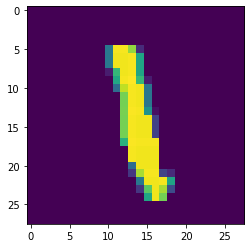

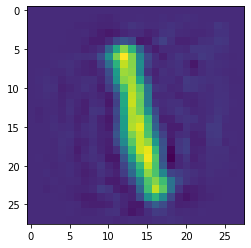

In [7]:
show_image(x, idx=2)
with torch.no_grad():
    show_image(output, idx=2)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=k)

data = train_dataset.data[:1000,:,:].view(1000, 28*28)
data = data/255

pca.fit(data)

# compression with PCA
x_pca = tensor(pca.inverse_transform(pca.transform(data)))

# compression with AE
img_ae = model(data).view(1000, 28, 28)

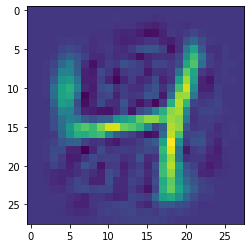

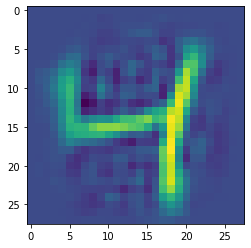

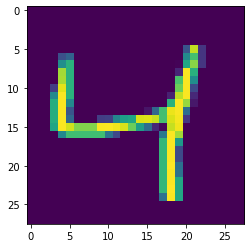

In [29]:
fig = plt.figure()
plt.imshow(x_pca[2].reshape(28,28))

fig = plt.figure()
with torch.no_grad():
    plt.imshow(img_ae[2].cpu().numpy())

img_orig = train_dataset.data[:1000,:,:].view(1000, 28, 28)
fig = plt.figure()
plt.imshow(img_orig[2].cpu().numpy())

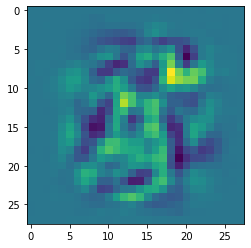

In [41]:
with torch.no_grad():
    noise = torch.randn(batch_size, k)
    generated_images = model.decoder(noise)
    
show_image(generated_images, idx=1)